## Урок 7

### Задание 1

К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях k.

In [98]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [99]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [100]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

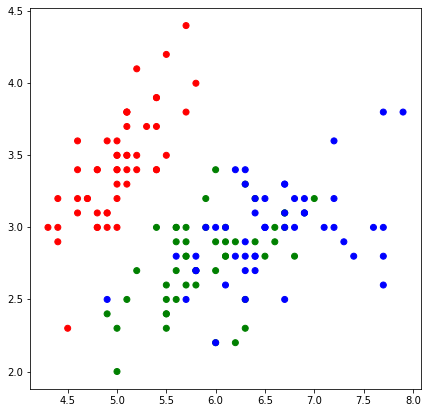

In [101]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [102]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

In [103]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [104]:
def knn_weighed(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # отберем k ближайших соседей
        k_neighbours = sorted(test_distances)[0:k]
                        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in k_neighbours:
            'classes[d[1]] += 1' # вес каждого соседа равен 1
            'classes[d[1]] += 1 / i' # вес каждого соседа равен 1/i
            classes[d[1]] += 0.5 ** i # вес каждого соседа равен d ** i
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [105]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [106]:
k = 1

y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
y_pred_w = knn_weighed(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k} и весe = d ** i: {accuracy(y_pred_w, y_test):.3f}')

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 1 и весe = d ** i: 0.667


In [86]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading = 'auto')

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

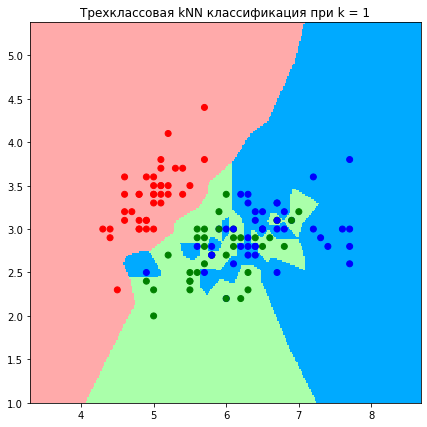

In [87]:
get_graph(X_train, y_train, k)

In [107]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
y_pred_w = knn_weighed(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k} и весe = d ** i: {accuracy(y_pred_w, y_test):.3f}')

Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 3 и весe = d ** i: 0.733


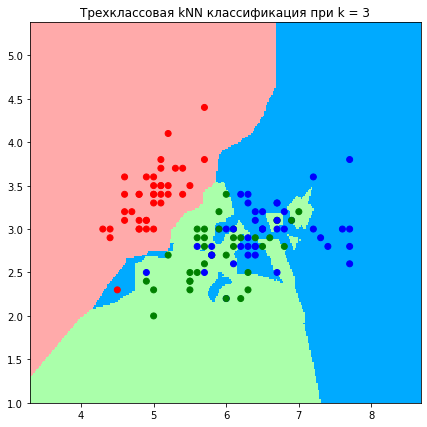

In [89]:
get_graph(X_train, y_train, k)

In [108]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
y_pred_w = knn_weighed(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k} и весe = d ** i: {accuracy(y_pred_w, y_test):.3f}')

Точность алгоритма при k = 5: 0.867
Точность алгоритма при k = 5 и весe = d ** i: 0.867


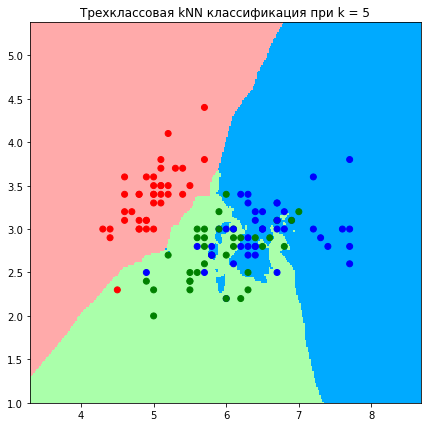

In [91]:
get_graph(X_train, y_train, k)

In [109]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')
y_pred_w = knn_weighed(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k} и весe = d ** i: {accuracy(y_pred_w, y_test):.3f}')

Точность алгоритма при k = 10: 0.833
Точность алгоритма при k = 10 и весe = d ** i: 0.833


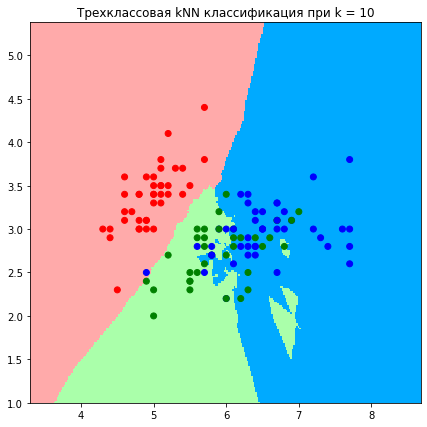

In [93]:
get_graph(X_train, y_train, k)

<font color = 'red'><b> Я проверила несколько вариантов расчета веса, но у меня каждый раз получается, что точность без взвешивания равна точности с взвешиванием. Я что-то не так делаю?

### Задание 2

Напишите функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).